In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [3]:
df_HSI = pd.read_csv('^HSI.csv')[:483]
df_COR = pd.read_csv('Corporate.csv')[:483]
df_SPY = pd.read_csv('SPY.csv')[:483]
df_Rea = pd.read_csv('DJ.csv')[:483]
df_Gol = pd.read_csv('GOL.csv')[:483]
df_TYX = pd.read_csv('^TYX.csv')[:483]
df_BTC = pd.read_csv('BTC.csv')[:483]


In [4]:
def cum_return(df):
    df['log_price']=df['Price'].apply(lambda x: np.log(x))
    daily_return = df['log_price'].shift(-1)[0:len(df)-1]-df['log_price'][0:len(df)-1]
    df=df.drop(len(df)-1)
    df['return']=daily_return
    df['cum_ret'] = df['return'].cumsum()
    df['st_price'] = df['Price']/df['Price'][0]
    return df[['Date','Price','return','cum_ret','st_price']]

In [5]:
COR = cum_return(df_COR)
HSI = cum_return(df_HSI)
SPY = cum_return(df_SPY)
REA = cum_return(df_Rea)
GOL = cum_return(df_Gol)
TYX = cum_return(df_TYX)
BTC = cum_return(df_BTC)

In [6]:
CORR = COR
CORR['HSI'] = HSI['st_price']
CORR['COR'] = COR['st_price']
CORR['SPY'] = SPY['st_price']
CORR['REA'] = REA['st_price']
CORR['GOL'] = GOL['st_price']
CORR['TYX'] = TYX['st_price']
CORR['BTC'] = BTC['st_price']
CORR = CORR.drop(['Price','return','cum_ret','st_price'],axis=1)
CORR

,Date,HSI,COR,SPY,REA,GOL,TYX,BTC
0,6/18/10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,6/21/10,1.010304,1.001771,0.998732,1.073659,1.001051,0.989550,1.0
2,6/22/10,1.041482,1.006573,1.017933,1.098916,0.982972,0.995770,1.0
3,6/23/10,1.012310,1.013112,0.980980,1.090698,1.015556,0.962926,1.0
4,6/24/10,1.007998,1.024929,0.973915,1.039485,1.021022,0.910923,1.0
...,...,...,...,...,...,...,...,...
477,4/17/12,1.314065,1.540408,2.727017,2.814088,1.281228,0.591689,103373.0
478,4/18/12,1.270010,1.521404,2.701567,2.797302,1.263906,0.547151,99930.0
479,4/19/12,1.246908,1.539352,2.675482,2.833201,1.262897,0.528490,82085.0
480,4/20/12,1.240481,1.542451,2.665972,2.847080,1.252806,0.501368,81273.0


In [7]:
def string_toDatetime(string):
    return datetime.datetime.strptime(string, "%Y-%m-%d")

In [8]:
HSI['Date']=HSI['Date'].apply(lambda x:string_toDatetime(x) )

In [9]:
Portfolio = HSI

In [10]:
Portfolio['HSI'] = HSI['cum_ret']
Portfolio['COR'] = COR['cum_ret']
Portfolio['SPY'] = SPY['cum_ret']
Portfolio['REA'] = REA['cum_ret']
Portfolio['GOL'] = GOL['cum_ret']
Portfolio['TYX'] = TYX['cum_ret']
Portfolio['BTC'] = BTC['cum_ret']

In [11]:
Portfolio=Portfolio.drop(['Price','return','cum_ret'],axis=1)

In [12]:
date = Portfolio.Date.astype('O')

/Users/yangqiongxiao/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


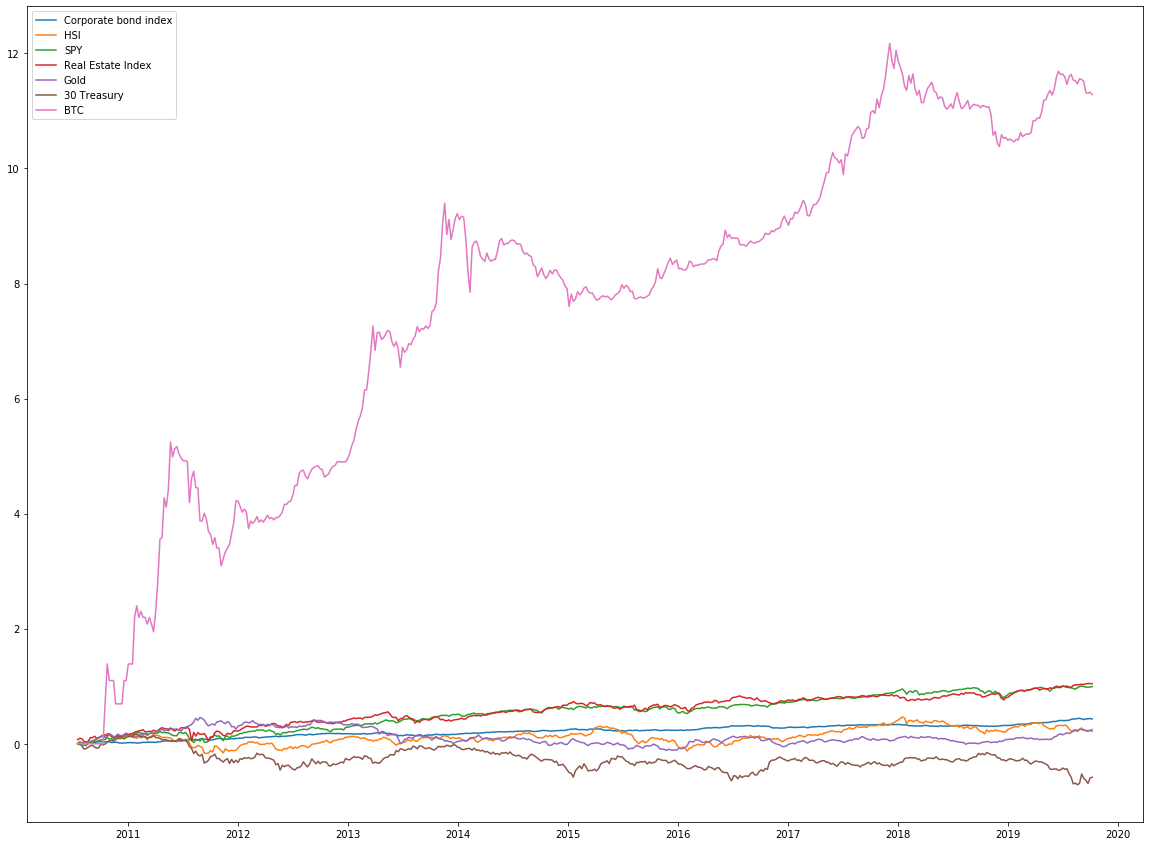

In [13]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(date, Portfolio[['COR','HSI','SPY','REA','GOL','TYX','BTC']])
ax.legend(['Corporate bond index','HSI','SPY','Real Estate Index','Gold','30 Treasury','BTC'])
# COR['cum_ret'].plot(figsize=(20,15),legend=True)
# SPY['cum_ret'].plot(figsize=(20,15),legend=True)
# REA['cum_ret'].plot(figsize=(20,15),legend=True)
# GOL['cum_ret'].plot(figsize=(20,15),legend=True)
# TYX['cum_ret'].plot(figsize=(20,15),legend=True)
# BTC['cum_ret'].plot(figsize=(20,15),legend=True)

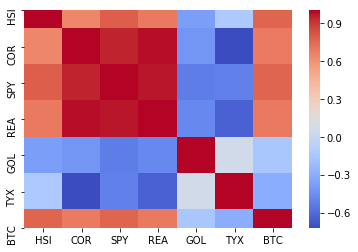

In [14]:
fig, ax = plt.subplots()
sns.heatmap(CORR.corr(),cmap='coolwarm',ax=ax)
# sns.heatmap(,annot=True)
# figsize=(15,10)

In [15]:
CORR.corr()

,HSI,COR,SPY,REA,GOL,TYX,BTC
HSI,1.000000,0.647692,0.788507,0.692043,-0.371452,-0.130361,0.770289
COR,0.647692,1.000000,0.948414,0.980869,-0.412536,-0.721012,0.689472
SPY,0.788507,0.948414,1.000000,0.969260,-0.523818,-0.510622,0.767281
REA,0.692043,0.980869,0.969260,1.000000,-0.477697,-0.636803,0.692027
GOL,-0.371452,-0.412536,-0.523818,-0.477697,1.000000,0.062817,-0.153667
TYX,-0.130361,-0.721012,-0.510622,-0.636803,0.062817,1.000000,-0.302329
BTC,0.770289,0.689472,0.767281,0.692027,-0.153667,-0.302329,1.000000


In [41]:
Portfolio2=pd.DataFrame()
Portfolio2['HSI'] = HSI['return']
Portfolio2['COR'] = COR['return']
Portfolio2['SPY'] = SPY['return']
Portfolio2['REA'] = REA['return']
Portfolio2['GOL'] = GOL['return']
Portfolio2['TYX'] = TYX['return']
Portfolio2['BTC'] = BTC['return']
Portfolio1 = Portfolio2.drop(['BTC'],axis=1)

In [17]:
def cal_optimal_sharpe_pfl_weights(return_array):
    mu = np.average(return_array,0)
    S = np.cov(return_array.T)
    ef = EfficientFrontier(mu, S)
    raw_weights = ef.max_sharpe(0)
    return raw_weights

In [18]:
cal_optimal_sharpe_pfl_weights(Portfolio1)

{0: 0.0,
 1: 0.7617006005754584,
 2: 0.14282993337099795,
 3: 0.07432595646505963,
 4: 2.917679780134459e-16,
 5: 2.6499336084844577e-16,
 6: 0.02114350958848344}

In [42]:
cal_optimal_sharpe_pfl_weights(Portfolio1)

{0: 0.0,
 1: 0.7619608985892572,
 2: 0.15911910613722002,
 3: 0.0789199952735225,
 4: 0.0,
 5: 6.530495897243174e-16}

In [43]:
cal_optimal_sharpe_pfl_weights(Portfolio2)

{0: 0.0,
 1: 0.7617006005754584,
 2: 0.14282993337099795,
 3: 0.07432595646505963,
 4: 2.917679780134459e-16,
 5: 2.6499336084844577e-16,
 6: 0.02114350958848344}

In [25]:
Portfolio1.std()

HSI    0.024572
COR    0.005584
SPY    0.018832
REA    0.024466
GOL    0.021251
TYX    0.034992
BTC    0.167974
dtype: float64

Text(0, 0.5, 'expected return')

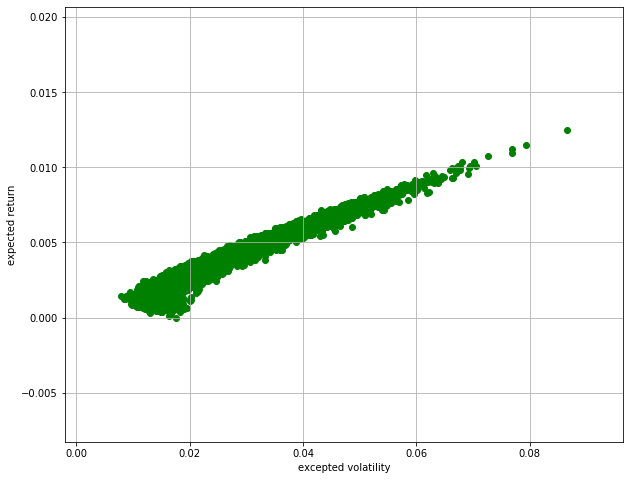

In [36]:
port_returns = []
port_variance = []
for p in range(8000):
    weights = np.random.random(7)
    weights /=np.sum(weights)
    port_returns.append(np.sum(Portfolio1.mean()*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(Portfolio1.cov(), weights))))
    
port_returns = np.array(port_returns)
port_variance = np.array(port_variance)
#risk free rate=1.87%
# risk_free = 0.0187
plt.figure(figsize = (10,8))
plt.scatter(port_variance, port_returns, marker = 'o',color = 'green')
# c=(port_returns-risk_free)/port_variance
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')